### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python



# 

# Assignment activity 1

### GitHub repository

In [1]:
# My GitHub repository link can be found below

https://github.com/KrispyPi/LSE_DA_NHS_Analytics.git

# Assignment activity 2

### Prepare the workstation

In [2]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [501]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv(r'/Users/christospieris/Documents/LSE Data Analytics/Course 2/actual_duration.csv')

# View the DataFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [502]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv(r'/Users/christospieris/Documents/LSE Data Analytics/Course 2/appointments_regional.csv')

# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [ ]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel(r'/Users/christospieris/Documents/LSE Data Analytics/Course 2/national_categories.xlsx')

# View the DataFrame.
nc

### Exploring the data set

**Question 1:** How many locations are there in the data set?

In [15]:
# Determine the number of locations
print("Number of unique locations in NHS dataset is:", ad['sub_icb_location_name'].nunique())

Number of unique locations in NHS dataset is: 106


**Question 2:** What are the five locations with the highest number of records?



In [16]:
# Determine the top five locations based on record count.
print("--------------------------------------------")
print("The 5 top locations with the most records are:")
print("--------------------------------------------")
print(ad['sub_icb_location_name'].value_counts().head(5))

--------------------------------------------
The 5 top locations with the most records are:
--------------------------------------------
NHS Norfolk and Waveney ICB - 26A                       1484
NHS Kent and Medway ICB - 91Q                           1484
NHS North West London ICB - W2U3Z                       1484
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y    1484
NHS Greater Manchester ICB - 14L                        1484
Name: sub_icb_location_name, dtype: int64


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [17]:
# Determine the number of service settings.
print("--------------------------------------------")
print("Service Setting Count:")
print("--------------------------------------------")
print(nc['service_setting'].value_counts(normalize=1).mul(100).round(1).astype(str) + '%')


--------------------------------------------
Service Setting Count:
--------------------------------------------
General Practice             44.0%
Primary Care Network         22.5%
Other                        17.0%
Extended Access Provision    13.2%
Unmapped                      3.4%
Name: service_setting, dtype: object


In [18]:
# Determine the number of context types.
print("--------------------------------------------")
print("Context Type Count:")
print("--------------------------------------------")
print(nc['context_type'].value_counts(normalize=1).mul(100).round(1).astype(str) + '%')

--------------------------------------------
Context Type Count:
--------------------------------------------
Care Related Encounter    85.7%
Inconsistent Mapping      10.9%
Unmapped                   3.4%
Name: context_type, dtype: object


In [19]:
# Determine the number of national categories.
print("--------------------------------------------")
print("National Categories Count:")
print("--------------------------------------------")
print(nc['national_category'].value_counts(normalize=1).mul(100).round(1).astype(str) + '%')

--------------------------------------------
National Categories Count:
--------------------------------------------
Inconsistent Mapping                                                   10.9%
General Consultation Routine                                           10.9%
General Consultation Acute                                             10.4%
Planned Clinics                                                         9.4%
Clinical Triage                                                         9.1%
Planned Clinical Procedure                                              7.3%
Structured Medication Review                                            5.4%
Service provided by organisation external to the practice               5.3%
Home Visit                                                              5.1%
Unplanned Clinical Activity                                             4.9%
Patient contact during Care Home Round                                  3.5%
Unmapped                            

In [20]:
# Determine the number of appointment status.
print("--------------------------------------------")
print("Appointment Status Count:")
print("--------------------------------------------")
print(ar['appointment_status'].value_counts(normalize=1).mul(100).round(1).astype(str) + '%')

--------------------------------------------
Appointment Status Count:
--------------------------------------------
Attended    38.9%
Unknown     33.7%
DNA         27.4%
Name: appointment_status, dtype: object


# 

# Assignment activity 3

**Question 1:** Between what dates were appointments scheduled? 

In [21]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head(5)


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [22]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head(5)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [112]:
# Change the date format of ad['appointment_date'].
from datetime import datetime

#ad['appointment_date'] = pd.to_datetime(ad.appointment_date)
#ad['appointment_date'] = ad['appointment_date'].dt.strftime('%d-%b-%y')
#print(ad.appointment_date)



ad['appointment_date'] = pd.to_datetime(ad.appointment_date)

print(ad['appointment_date'])
# View the DateFrame.


0        2021-12-01
1        2021-12-01
2        2021-12-01
3        2021-12-01
4        2021-12-01
            ...    
137788   2022-06-30
137789   2022-06-30
137790   2022-06-30
137791   2022-06-30
137792   2022-06-30
Name: appointment_date, Length: 137793, dtype: datetime64[ns]


In [163]:
# Change the date format of ar['appointment_date'] OR NC?

nc['appointment_date'] = pd.to_datetime(nc.appointment_date)
nc['appointment_month']= pd.to_datetime(nc.appointment_month)
#print(nc.appointment_date)
print(nc)


#ar['appointment_month'] = pd.to_datetime(ar.appointment_month)
#ar['appointment_month'] = ar['appointment_month'].dt.strftime('%b-%y')
#print(ar.appointment_month)

# View the DateFrame.


       appointment_date icb_ons_code  \
0            2021-08-02    E54000050   
1            2021-08-02    E54000050   
2            2021-08-02    E54000050   
3            2021-08-02    E54000050   
4            2021-08-02    E54000050   
...                 ...          ...   
817389       2022-06-30    E54000054   
817390       2022-06-30    E54000054   
817391       2022-06-30    E54000054   
817392       2022-06-30    E54000054   
817393       2022-06-30    E54000054   

                             sub_icb_location_name            service_setting  \
0       NHS North East and North Cumbria ICB - 00L       Primary Care Network   
1       NHS North East and North Cumbria ICB - 00L                      Other   
2       NHS North East and North Cumbria ICB - 00L           General Practice   
3       NHS North East and North Cumbria ICB - 00L           General Practice   
4       NHS North East and North Cumbria ICB - 00L           General Practice   
...                              

In [113]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.

print('The minimum date in the ad DataFrame is:', ad.appointment_date.min())
print('The maximum date in the ad DataFrame is:', ad.appointment_date.max())


The minimum date in the ad DataFrame is: 2021-12-01 00:00:00
The maximum date in the ad DataFrame is: 2022-06-30 00:00:00


In [115]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.

print('The minimum date in the nc DataFrame is:', min(nc.appointment_date))
print('The maximum date in the nc DataFrame is:', max(nc.appointment_date))

The minimum date in the nc DataFrame is: 2021-08-01 00:00:00
The maximum date in the nc DataFrame is: 2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [ ]:
# For each of these service settings, determine the number of records available for the period and the location. 
nc_NW = nc.query('sub_icb_location_name.str.contains("NHS North West London", case=False).values')
nc_NW_filtered = nc_NW[(nc_NW['appointment_date']>'2021-01-01') & (nc_NW['appointment_date']<'2022-06-01')]

# Initialise an empty list to append the result of the loop
sum_entries=[]
# Run the loop to generate the counter
for type in nc_NW_filtered['service_setting'].unique():
    counter = nc_NW_filtered[nc_NW_filtered['service_setting']== type]
    print("The number of records for", type, "is", counter ['count_of_appointments'].sum())
    sum_entries.append(counter ['count_of_appointments'].sum())
# Print the max value of the list
print("The max value is:",max(sum_entries))
# View the output.


**Question 3:** Which month had the highest number of appointments?

In [ ]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.

nc_to_be_grouped = nc[['appointment_month','count_of_appointments']]
nc_grouped = nc_to_be_grouped.groupby('appointment_month')
nc_grouped.sum().sort_values('count_of_appointments',ascending=0).head(1)



**Question 4:** What was the total number of records per month?

In [177]:
# Total number of records per month.
number_of_records_per_month = nc_grouped.sum().sort_values('count_of_appointments',ascending=0)
number_of_records_per_month

,count_of_appointments
appointment_month,
2021-11-01,30405070
2021-10-01,30303834
2022-03-01,29595038
2021-09-01,28522501
2022-05-01,27495508
2022-06-01,25828078
2022-01-01,25635474
2022-02-01,25355260
2021-12-01,25140776


# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [232]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [182]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month']=nc['appointment_month'].astype('string')
nc['appointment_month']

0         2021-08-01
1         2021-08-01
2         2021-08-01
3         2021-08-01
4         2021-08-01
             ...    
817389    2022-06-01
817390    2022-06-01
817391    2022-06-01
817392    2022-06-01
817393    2022-06-01
Name: appointment_month, Length: 817394, dtype: string

In [190]:
# Aggregate on monthly level and determine the sum of records per month.
nc_to_be_grouped = nc[['appointment_month','count_of_appointments',
                       'service_setting','context_type','national_category']]
nc_grouped_by_month = nc_to_be_grouped.groupby('appointment_month').sum()
nc_grouped_by_month
# View output.


,count_of_appointments
appointment_month,
2021-08-01,23852171
2021-09-01,28522501
2021-10-01,30303834
2021-11-01,30405070
2021-12-01,25140776
2022-01-01,25635474
2022-02-01,25355260
2022-03-01,29595038
2022-04-01,23913060


**Service settings:**

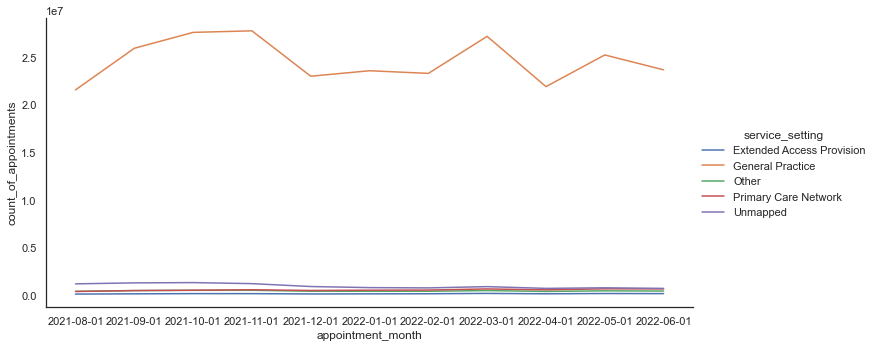

In [241]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.


nc_ss_grouped_by_month = nc_to_be_grouped.groupby(['appointment_month','service_setting']).sum().reset_index()
nc_ss_grouped_by_month

sns.relplot(
    data=nc_ss_grouped_by_month, 
    x="appointment_month", y="count_of_appointments", hue="service_setting", 
    height=5, aspect=2, 
    kind="line"
)









**Context types:**

In [245]:
# Create a separate data set that can be used in future weeks. 
nc_ct_grouped_by_month = nc_to_be_grouped.groupby(['appointment_month','context_type']).sum().reset_index()



# View output.
nc_ct_grouped_by_month


,appointment_month,context_type,count_of_appointments
0,2021-08-01,Care Related Encounter,20255235
1,2021-08-01,Inconsistent Mapping,2363093
2,2021-08-01,Unmapped,1233843
3,2021-09-01,Care Related Encounter,24404251
4,2021-09-01,Inconsistent Mapping,2782135
5,2021-09-01,Unmapped,1336115
6,2021-10-01,Care Related Encounter,26125201
7,2021-10-01,Inconsistent Mapping,2811977
8,2021-10-01,Unmapped,1366656
9,2021-11-01,Care Related Encounter,26282778


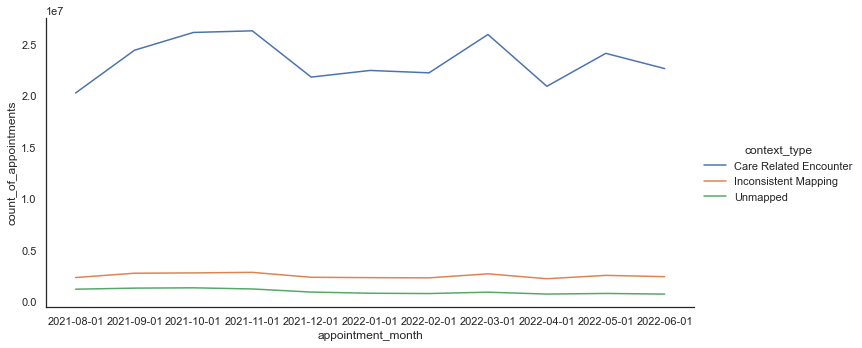

In [264]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.relplot(
    data=nc_ct_grouped_by_month, 
    x="appointment_month", y="count_of_appointments", hue="context_type", 
    height=5, aspect=2, 
    kind="line"
)

**National categories:**

In [247]:
# Create a separate data set that can be used in future weeks. 

nc_nc_grouped_by_month = nc_to_be_grouped.groupby(['appointment_month','national_category']).sum().reset_index()
nc_nc_grouped_by_month


# View output.


,appointment_month,national_category,count_of_appointments
0,2021-08-01,Care Home Needs Assessment & Personalised Care and Support Planning,29676
1,2021-08-01,Care Home Visit,47583
2,2021-08-01,Clinical Triage,3704207
3,2021-08-01,General Consultation Acute,4280920
4,2021-08-01,General Consultation Routine,7756045
...,...,...,...
193,2022-06-01,Social Prescribing Service,55066
194,2022-06-01,Structured Medication Review,187800
195,2022-06-01,Unmapped,758640
196,2022-06-01,Unplanned Clinical Activity,274491


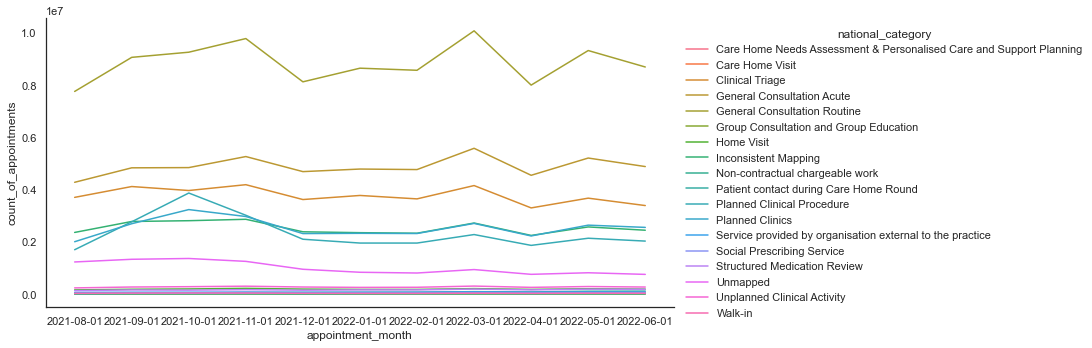

In [248]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.relplot(
    data=nc_nc_grouped_by_month, 
    x="appointment_month", y="count_of_appointments", hue="national_category", 
    height=5, aspect=2, 
    kind="line"
)

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [249]:
# Create a separate data set that can be used in future weeks. 

nc_to_be_grouped_by_day = nc[['appointment_date','count_of_appointments','service_setting',
                              'context_type','national_category']]
nc_ss_grouped_by_day = nc_to_be_grouped_by_day.groupby(['appointment_date','service_setting']).sum()
nc_ss_grouped_by_day

nc_ss = nc_ss_grouped_by_day.reset_index()

nc_ss_august = nc_ss.query("appointment_date >= '2021-08-01' and appointment_date < '2021-08-31'")
nc_ss_august

# View output.


,appointment_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,438
1,2021-08-01,General Practice,3411
2,2021-08-01,Other,401
3,2021-08-01,Primary Care Network,323
4,2021-08-01,Unmapped,1054
...,...,...,...
145,2021-08-30,Extended Access Provision,305
146,2021-08-30,General Practice,2927
147,2021-08-30,Other,380
148,2021-08-30,Primary Care Network,195


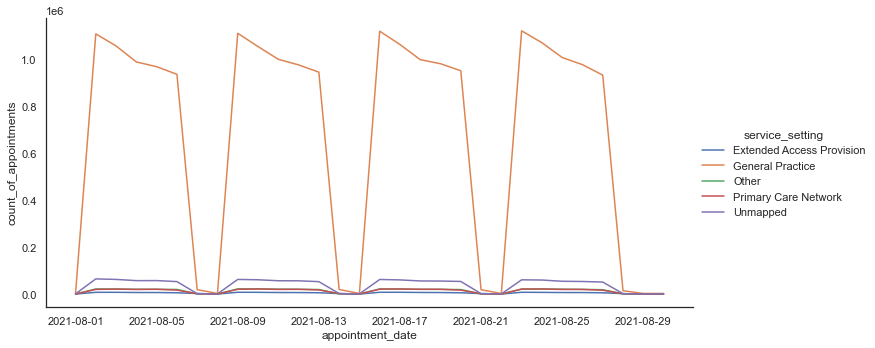

In [251]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.

sns.relplot(
    data=nc_ss_august, 
    x="appointment_date", y="count_of_appointments", hue="service_setting", 
    height=5, aspect=2, 
    kind="line"
)


**Autumn (October 2021):**

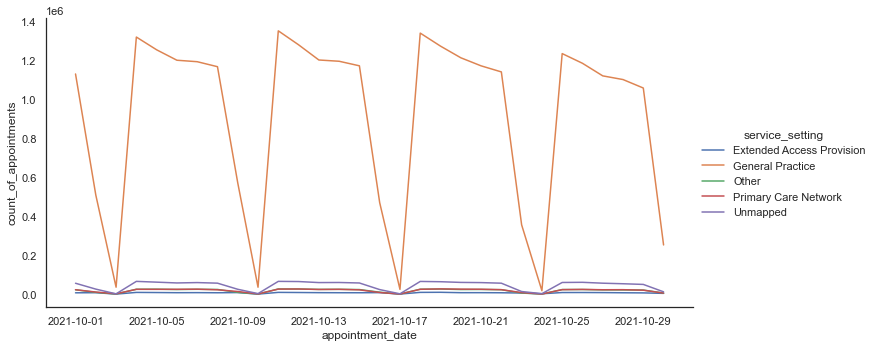

In [252]:
# Look at October 2021 in more detail to allow a closer look.
nc_ss_october = nc_ss.query("appointment_date >= '2021-10-01' and appointment_date < '2021-10-31'")
nc_ss_october
# Create a lineplot.
sns.relplot(
    data=nc_ss_october, 
    x="appointment_date", y="count_of_appointments", hue="service_setting", 
    height=5, aspect=2, 
    kind="line"
)




**Winter (January 2022):**

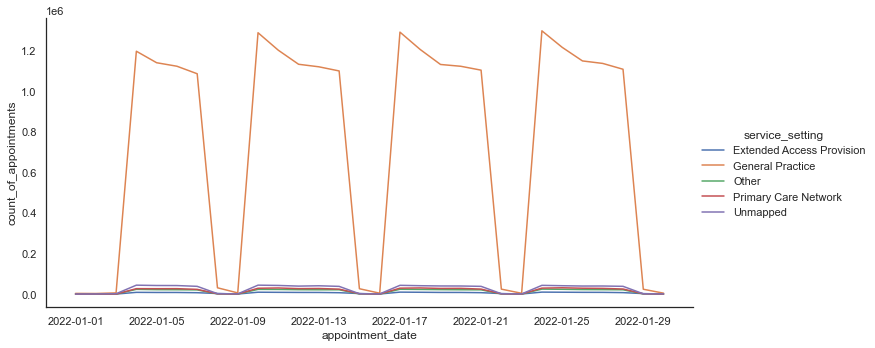

In [253]:
# Look at January 2022 in more detail to allow a closer look.
nc_ss_january = nc_ss.query("appointment_date >= '2022-01-01' and appointment_date < '2022-01-31'")
nc_ss_january
# Create a lineplot.
sns.relplot(
    data=nc_ss_january, 
    x="appointment_date", y="count_of_appointments", hue="service_setting", 
    height=5, aspect=2, 
    kind="line"
)



**Spring (April 2022):**

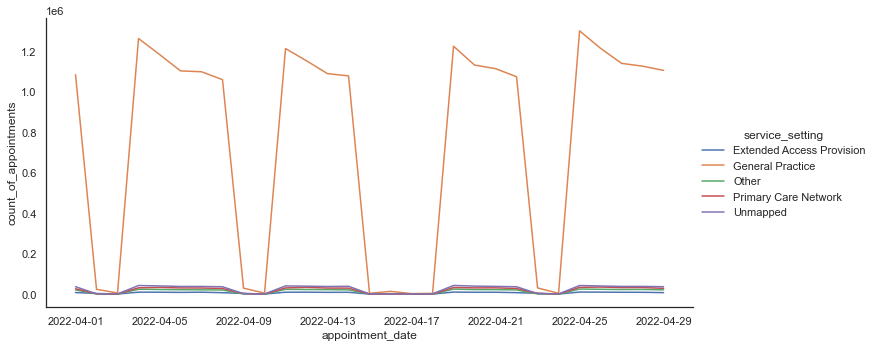

In [262]:
# Look at April 2022 in more detail to allow a closer look.
nc_ss_april = nc_ss.query("appointment_date >= '2022-04-01' and appointment_date < '2022-04-30'")
nc_ss_april
# Create a lineplot.
sns.relplot(
    data=nc_ss_april, 
    x="appointment_date", y="count_of_appointments", hue="service_setting", 
    height=5, aspect=2, 
    kind="line",
    ci=None
)





# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [43]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [288]:
# Load the data set.

tweets = pd.read_csv(r'/Users/christospieris/Documents/LSE Data Analytics/Course 2/tweets.csv')

# View the DataFrame.

tweets.head(5)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [45]:
# Explore the metadata.


In [290]:
# Explore the data set.
tweets.info()
tweets.describe()
tweets['tweet_retweet_count'].value_counts(ascending=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
tweet_retweet_count with value_counts()


0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64

# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.

Considering we are interested in tweets that have information of substance to convey one can make the argument that dropping tweets that have not been retweeted would be a safe way forward in reducing the sample size without loosing knowledge. The project decided to continue working on the full dataset to provide the breadth of views expressed on the platform when it comes to NHS. 

In [294]:
# Create a new DataFrame containing only the text.
tweets_text_extracted = tweets.select_dtypes(exclude=['int64','bool'])
tweets_text_extracted.info()
# View the DataFrame.
tweets_text_extracted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_full_text          1174 non-null   object
 1   tweet_entities           1174 non-null   object
 2   tweet_entities_hashtags  1007 non-null   object
 3   tweet_metadata           1174 non-null   object
 4   tweet_lang               1174 non-null   object
dtypes: object(5)
memory usage: 46.0+ KB


,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_lang
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",en
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",en
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",en
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",en
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",en
...,...,...,...,...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 'recent'}",en
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",en
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices': [209, 213]}, {'text': 'healthcare', 'indices': [235, 246]}], 'symbols': [], 'user_mentions': [{'screen_name': '...","#webinar, #ESG, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",en
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYym

In [330]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [323]:
# Display the first 30 records.
tags_Series = pd.Series(data=tags)
tags_Series.head(30)


0                                    #healthcare
1                                 #premisehealth
2                                        #hiring
3                                    #healthcare
4                                        🚨#new:🚨
5                                look!\n\n#blogs
6                         #digitaltransformation
7                                 #cybersecurity
8                                    #accounting
9                                       #finance
10                                   #healthcare
11    https://t.co/jrgqeqdme4\n.\n#firstcoastcna
12                                      #cnaexam
13                           #cnaexampreparation
14                                 #jacksonville
15                                  #cnatraining
16                                        #nurse
17                                      #nursing
18                                    #nurselife
19                            #nursepractitioner
20                  

In [353]:
# Convert the series to a DataFrame in preparation for visualisation.
tags_DataFrame = pd.DataFrame(tags_Series, columns = ['Hashtags']).reset_index()
tags_DataFrame['count'] = tags_DataFrame.groupby('Hashtags')['index'].transform('count')
tags_DataFrame=tags_DataFrame.sort_values(by=['count'], ascending=0)

tags_DataFrame
# Rename the columns.


,index,Hashtags,count
0,0,#healthcare,716
522,522,#healthcare,716
2120,2120,#healthcare,716
2115,2115,#healthcare,716
2113,2113,#healthcare,716
...,...,...,...
3364,3364,#ageism,1
3363,3363,#sexism,1
2122,2122,#medicalhelp,1
3361,3361,more.\n\n#healthcareinnovation,1


In [354]:
# Fix the count datatype.
tags_DataFrame.info()

# View the result.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 0 to 783
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     4333 non-null   int64 
 1   Hashtags  4333 non-null   object
 2   count     4333 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 135.4+ KB


In [368]:
# Display records where the count is larger than 10.
tags_DataFrame_G10 = tags_DataFrame[tags_DataFrame.groupby('Hashtags')['count'].transform('size')>10]
tags_DataFrame_G10

,index,Hashtags,count
0,0,#healthcare,716
522,522,#healthcare,716
2120,2120,#healthcare,716
2115,2115,#healthcare,716
2113,2113,#healthcare,716
...,...,...,...
2463,2463,#innovation,11
6,6,#digitaltransformation,11
499,499,#healthcareit,11
859,859,#healthcare?,11


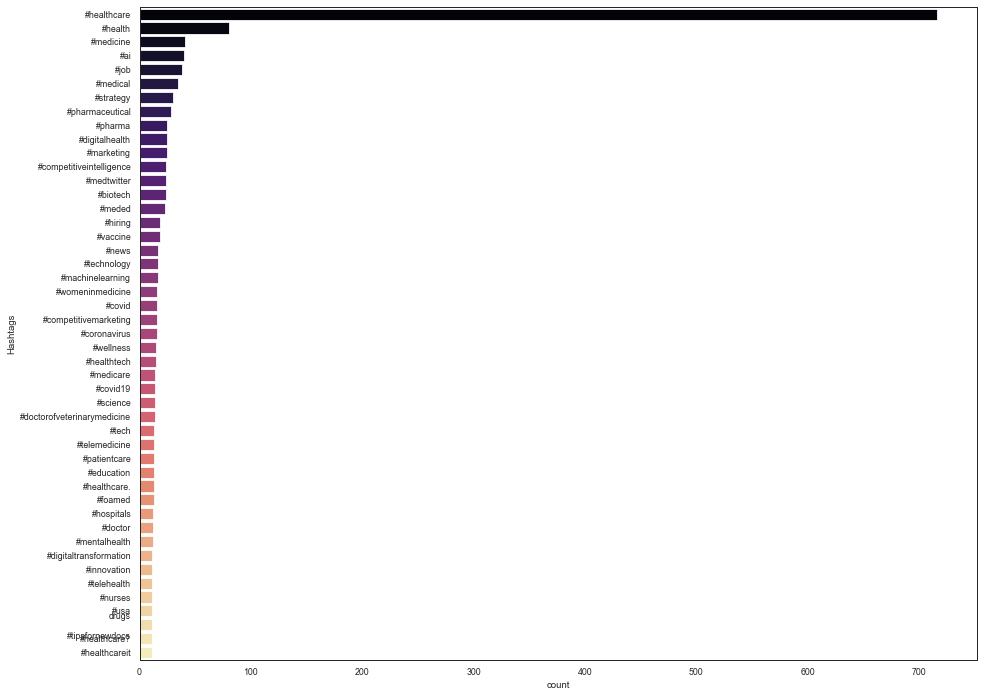

In [500]:
# Create a Seaborn barplot indicating records with a count >10 records.
sns.barplot(tags_DataFrame_G10['count'],tags_DataFrame_G10['Hashtags'],palette="magma")
plt.show()

# 

# Assignment activity 6

### Investigate the main concerns posed by the NHS. 

In [371]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar

# View the DataFrame.


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [374]:
# Print the min and max dates.
print("The minimum date found in the Regional Appointments data set is:",ar['appointment_month'].min())
print("The maximum date found in the Regional Appointments data set is:",ar['appointment_month'].max())


The minimum date found in the Regional Appointments data set is: 2020-01
The maximum date found in the Regional Appointments data set is: 2022-06


In [376]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_after_August_2021 = ar.query('appointment_month>"2021-08"')
ar_after_August_2021

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3850,E54000034,2021-09,Attended,GP,Face-to-Face,1 Day,8288
3851,E54000034,2021-09,Attended,GP,Face-to-Face,15 to 21 Days,3827
3852,E54000034,2021-09,Attended,GP,Face-to-Face,2 to 7 Days,13466
3853,E54000034,2021-09,Attended,GP,Face-to-Face,22 to 28 Days,1300
3854,E54000034,2021-09,Attended,GP,Face-to-Face,8 to 14 Days,6825
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 1:** Should the NHS start looking at increasing staff levels? 

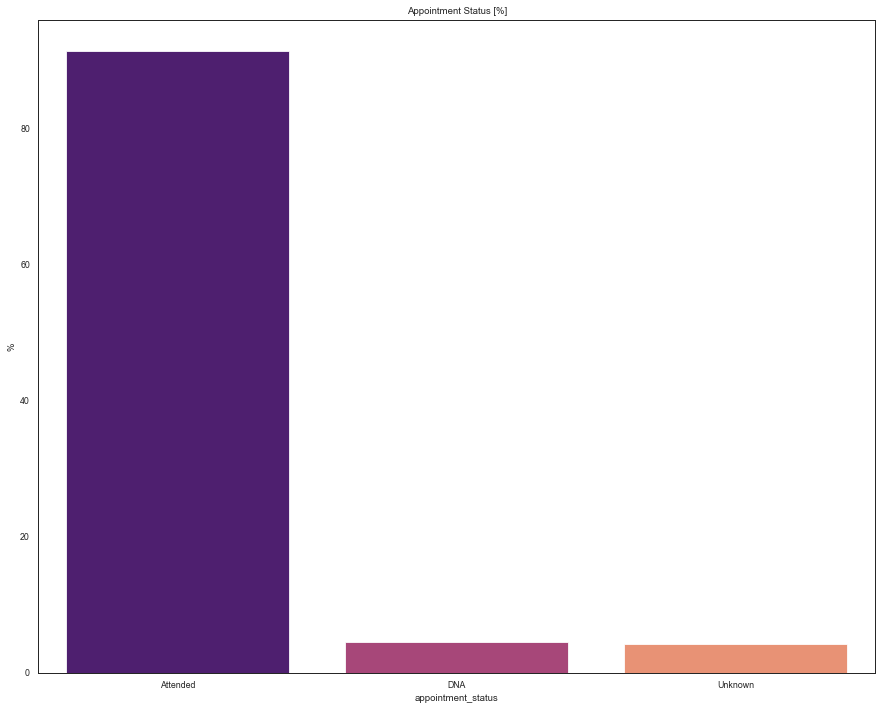

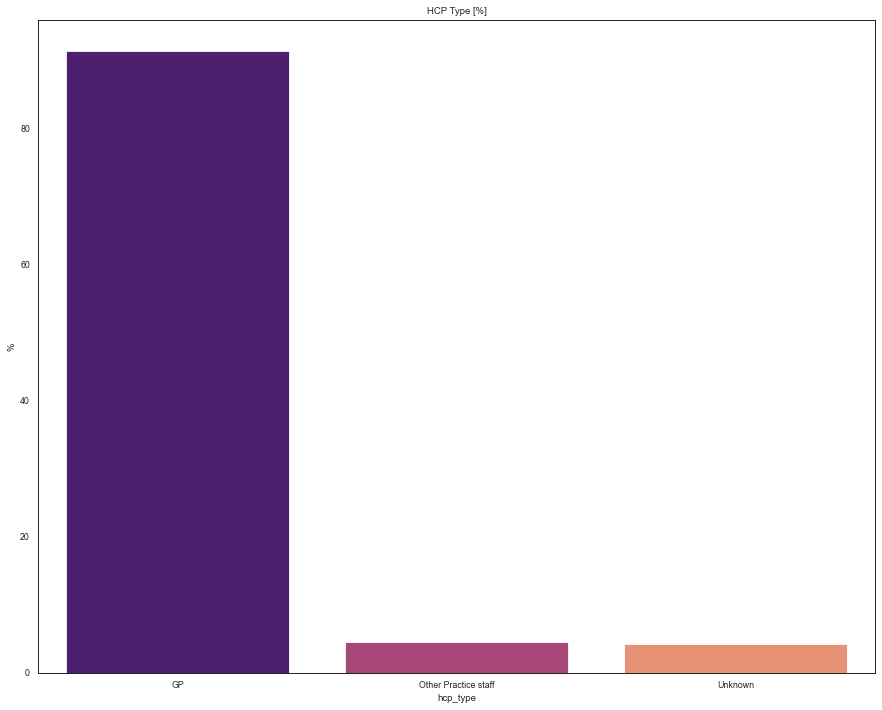

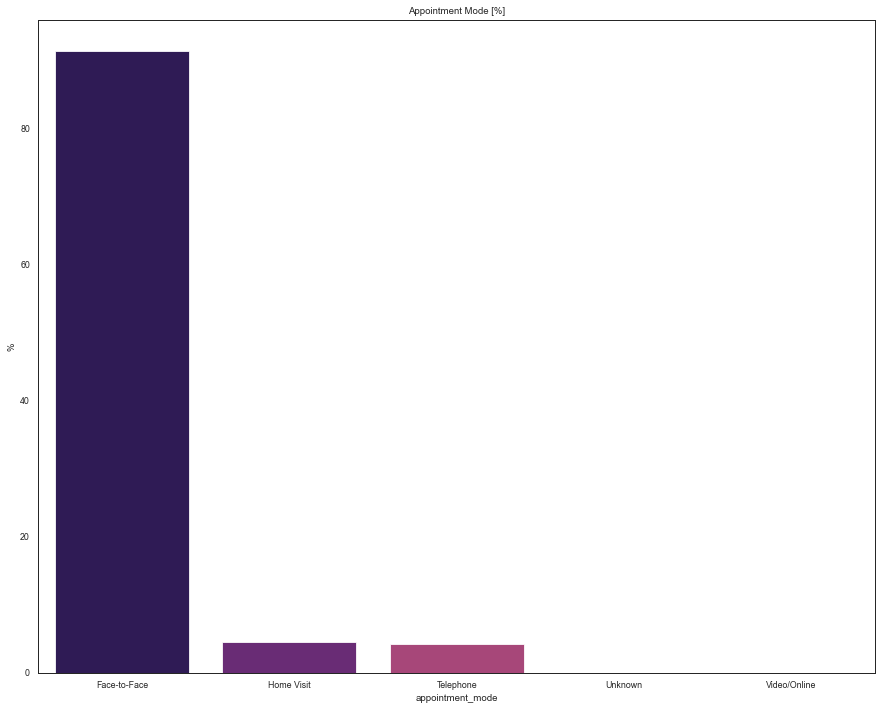

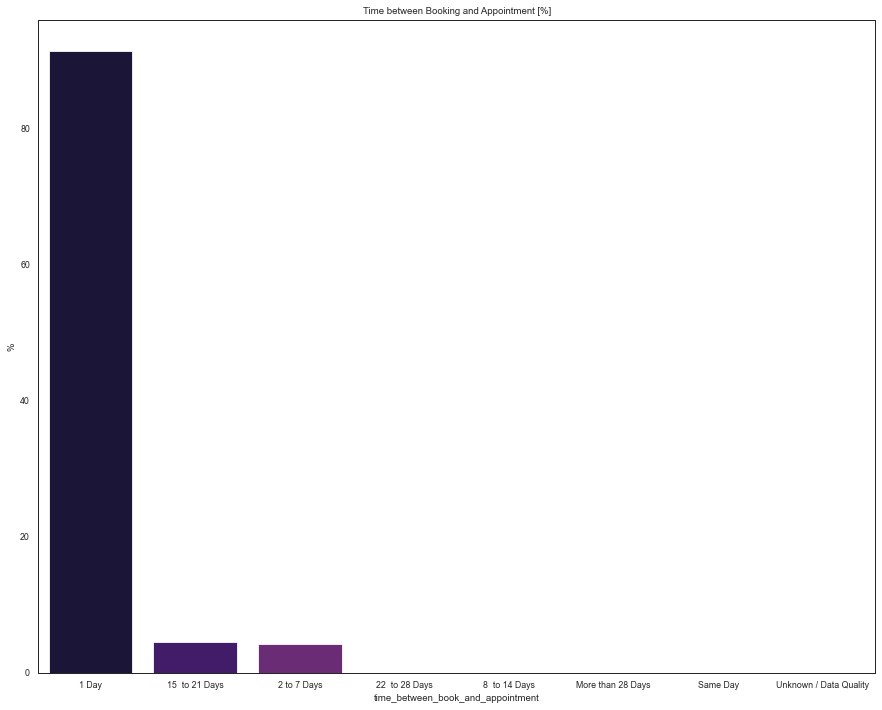

In [401]:
# Create an aggregated data set to review the different features.
sns.set_context('paper')

ar_agg = pd.DataFrame(data = ar_after_August_2021, columns =['appointment_month','appointment_status',
                                 'hcp_type','appointment_mode','time_between_book_and_appointment',
                                 'count_of_appointments'])
# Aggregate by appointment status
ar_agg_grouped_by_appointment_status = ar_agg.groupby('appointment_status')['count_of_appointments'].sum().reset_index()
# Create a new column to include the % calculation
ar_agg_grouped_by_appointment_status['%'] = 100 * ar_agg_grouped_by_appointment_status['count_of_appointments'] / ar_agg_grouped_by_appointment_status['count_of_appointments'].sum()
# View the result
ar_agg_grouped_by_appointment_status
# Plot the result in a barplot
sns.barplot(ar_agg_grouped_by_appointment_status['appointment_status'],
            ar_agg_grouped_by_appointment_status['%'],palette="magma")
plt.title('Appointment Status [%]')
plt.show()

# The rest of this code block follows the same pattern as the one above
ar_agg_grouped_by_hcp_type = ar_agg.groupby('hcp_type')['count_of_appointments'].sum().reset_index()
ar_agg_grouped_by_hcp_type['%'] = 100 * ar_agg_grouped_by_appointment_status['count_of_appointments'] / ar_agg_grouped_by_appointment_status['count_of_appointments'].sum()
ar_agg_grouped_by_hcp_type

sns.barplot(ar_agg_grouped_by_hcp_type['hcp_type'],
            ar_agg_grouped_by_hcp_type['%'],palette="magma")
plt.title('HCP Type [%]')
plt.show()

# The rest of this code block follows the same pattern as the one above
ar_agg_grouped_by_appointment_mode = ar_agg.groupby('appointment_mode')['count_of_appointments'].sum().reset_index()
ar_agg_grouped_by_appointment_mode['%'] = 100 * ar_agg_grouped_by_appointment_status['count_of_appointments'] / ar_agg_grouped_by_appointment_status['count_of_appointments'].sum()
ar_agg_grouped_by_appointment_mode

sns.barplot(ar_agg_grouped_by_appointment_mode['appointment_mode'],
            ar_agg_grouped_by_appointment_mode['%'],palette="magma")
plt.title('Appointment Mode [%]')
plt.show()

# The rest of this code block follows the same pattern as the one above
ar_agg_grouped_by_time_between_book_and_appointment = ar_agg.groupby('time_between_book_and_appointment')['count_of_appointments'].sum().reset_index()
ar_agg_grouped_by_time_between_book_and_appointment['%'] = 100 * ar_agg_grouped_by_appointment_status['count_of_appointments'] / ar_agg_grouped_by_appointment_status['count_of_appointments'].sum()
ar_agg_grouped_by_time_between_book_and_appointment

sns.barplot(ar_agg_grouped_by_time_between_book_and_appointment['time_between_book_and_appointment'],
            ar_agg_grouped_by_time_between_book_and_appointment['%'],palette="magma")
plt.title('Time between Booking and Appointment [%]')
plt.show()



In [425]:
# Determine the total number of appointments per month.
ar_Per_Month = ar_agg.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
ar_Per_Month
# Add a new column to indicate the average utilisation of services.
NHS_daily_capacity = 1200000
ar_Per_Month['avg_util (%)']=100*((ar_Per_Month['count_of_appointments']/30)/NHS_daily_capacity).round(1)

# Monthly aggregate / 30 to get to a daily value.


# View the DataFrame.
ar_Per_Month

,appointment_month,count_of_appointments,avg_util (%)
0,2021-09,28522501,80.0
1,2021-10,30303834,80.0
2,2021-11,30405070,80.0
3,2021-12,25140776,70.0
4,2022-01,25635474,70.0
5,2022-02,25355260,70.0
6,2022-03,29595038,80.0
7,2022-04,23913060,70.0
8,2022-05,27495508,80.0
9,2022-06,25828078,70.0


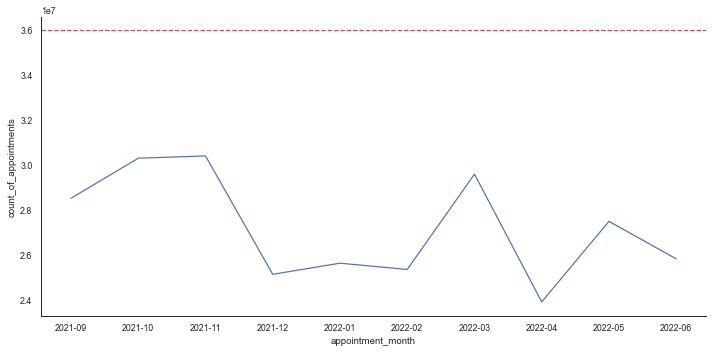

In [472]:
ar_Per_Month['appointment_month']=ar_Per_Month['appointment_month'].astype('string')

# Plot sum of count of monthly visits.
graph = sns.relplot(
    data=ar_Per_Month, 
    x="appointment_month", y="count_of_appointments",
    height=5, aspect=2, 
    kind="line"
)
monthly_capacity=NHS_daily_capacity*30
x_values=ar_Per_Month['appointment_month']
monthly_capacity

plt.axhline(y=monthly_capacity,linestyle='dashed',color='r')




# Convert the appointment_month to string data type for ease of visualisation.


# Create a lineplot with Seaborn.


(0.0, 100.0)

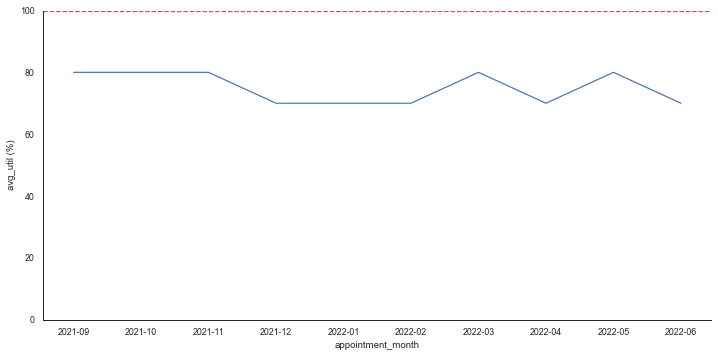

In [499]:
# Plot monthly capacity utilisation.
sns.relplot(
    data=ar_Per_Month, 
    x="appointment_month", y="avg_util (%)",
    height=5, aspect=2, 
    kind="line",
    palette="magma"
)
plt.axhline(y=100,linestyle='dashed',color='r')
plt.ylim(0,100)
# Create a lineplot.


**Question 2:** How do the healthcare professional types differ over time?

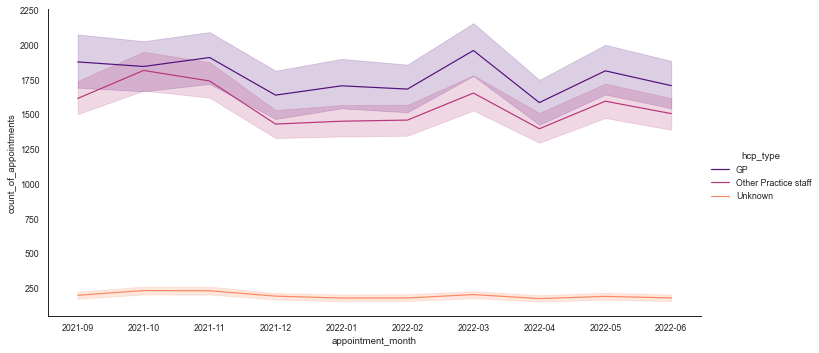

In [498]:
# Create a line plot to answer the question.
sns.relplot(
    data=ar_agg, 
    x="appointment_month", y="count_of_appointments", hue='hcp_type',
    height=5, aspect=2, 
    kind="line",
    palette="magma"
)

**Question 3:** Are there significant changes in whether or not visits are attended?

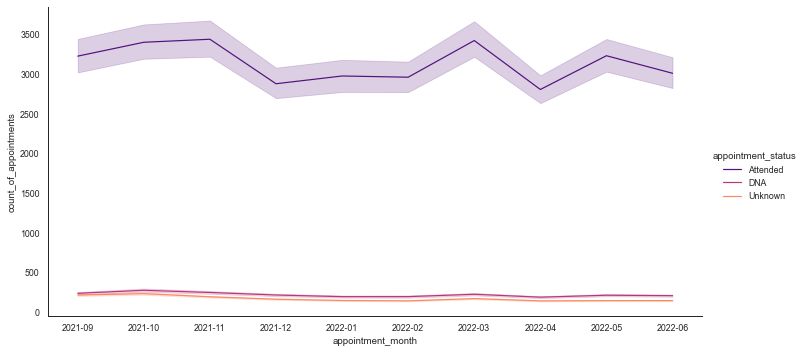

In [497]:
# Create a line plot to answer the question.
sns.relplot(
    data=ar_agg, 
    x="appointment_month", y="count_of_appointments", hue='appointment_status',
    height=5, aspect=2, 
    kind="line",
    palette="magma"
)

**Question 4:** Are there changes in terms of appointment type and the busiest months?

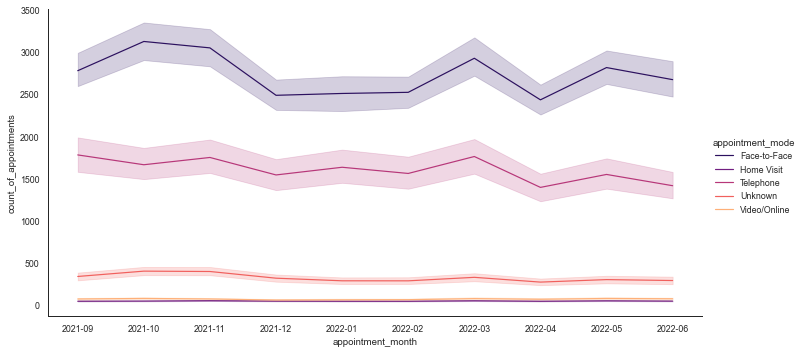

In [496]:
# Create a line plot to answer the question.
sns.relplot(
    data=ar_agg, 
    x="appointment_month", y="count_of_appointments", hue='appointment_mode',
    height=5, aspect=2, 
    kind="line",
    palette="magma"
)

**Question 5:** Are there any trends in time between booking an appointment?

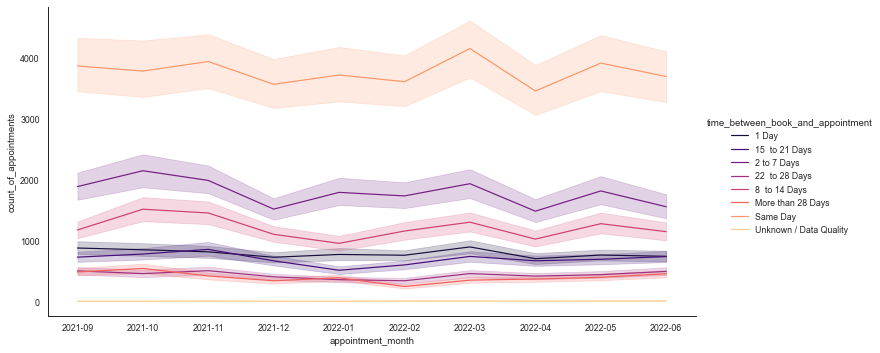

In [495]:
# Create a line plot to answer the question.
sns.relplot(
    data=ar_agg, 
    x="appointment_month", y="count_of_appointments", hue='time_between_book_and_appointment',
    height=5, aspect=2, 
    kind="line",
    palette="magma"
)

**Question 6:** How do the spread of service settings compare?

In [482]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08-01
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08-01
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08-01
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08-01
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08-01


In [491]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_grouped_by_month = nc.groupby(['appointment_month','service_setting'])['count_of_appointments'].sum().reset_index()
# View the DataFrame.
nc_grouped_by_month

,appointment_month,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,160927
1,2021-08-01,General Practice,21575852
2,2021-08-01,Other,449101
3,2021-08-01,Primary Care Network,432448
4,2021-08-01,Unmapped,1233843
5,2021-09-01,Extended Access Provision,187906
6,2021-09-01,General Practice,25940821
7,2021-09-01,Other,527174
8,2021-09-01,Primary Care Network,530485
9,2021-09-01,Unmapped,1336115


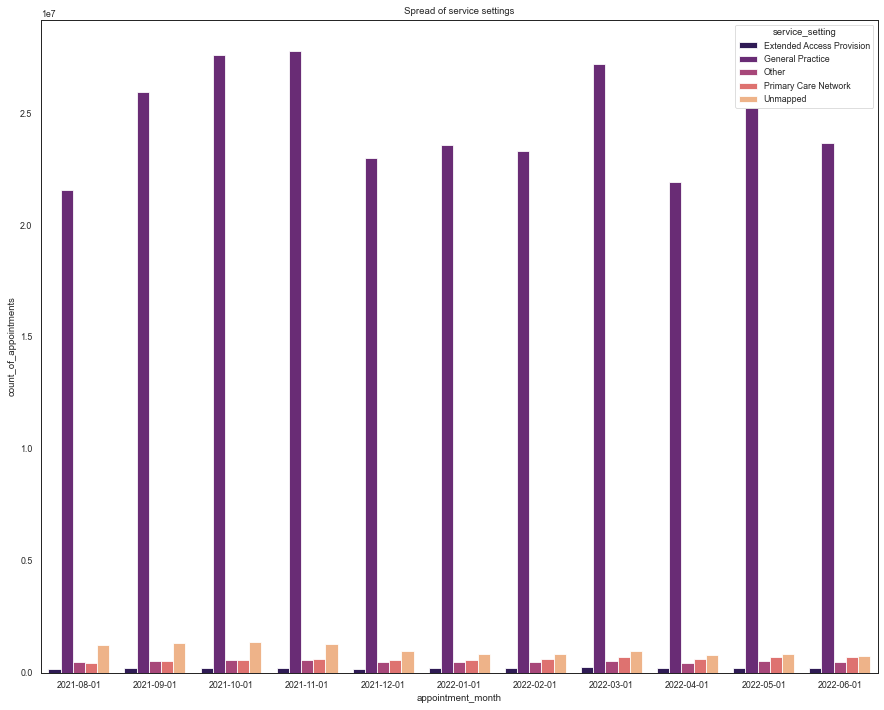

In [492]:
# Create a boxplot to investigate spread of service settings.
sns.barplot(data = nc_grouped_by_month,
            x = 'appointment_month',
            y = 'count_of_appointments',
            hue = 'service_setting',          
            palette="magma")
plt.title('Spread of service settings')
plt.show()

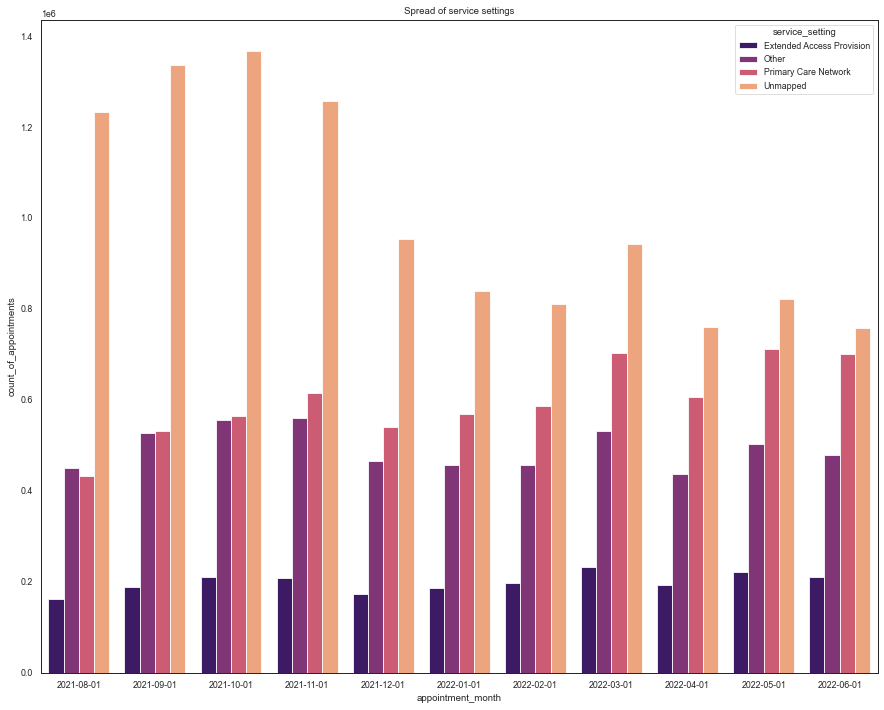

In [494]:
# Create a boxplot to investigate the service settings without GP.
data = nc_grouped_by_month.loc[nc_grouped_by_month['service_setting']!='General Practice']
sns.barplot(data = data,
            x = 'appointment_month',
            y = 'count_of_appointments',
            hue = 'service_setting',          
            palette="magma")
plt.title('Spread of service settings')
plt.show()

# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.

Key findings and recommendations

The NHS networks were well resourced to meet demand for the given period, with utilisation averaging 75%. Focus areas should be to mitigate risks were bottlenecks can occur and by refining the current reporting and data management to benefit from data driven operations especially during the busiest months of October, November.

1	Analysing historical data covering a period where the UK was affected by the pandemic, the project showed that only a fraction of the appointments booked were not attended (<10%). It is reasonable to predict that this number will only get smaller in the time after the investigated time window, considering the social norm will be restored post-pandemic. 

2	The project identified that the biggest set of appointments are served by GP. Considering this is an area of potential congestion and bottle-neck formation, it is part of this project’s recommendation that the NHS investigates for alternative ways to deliver appointments were possible. Investing in upskilling other practice staff and / or improving triage stages could be considered to mitigate this risk.

3	Face-to-face meetings were shown to be the most popular. The project suggests that NHS invests in other means to deliver consultation and at the same in educating people to take up alternative routes such as tele-health appointments. Resource management will benefit from the agility that virtual settings can offer.

4	Most appointments were made a day before they were supposed to take place. While this will be a hard requirement for certain health conditions, the project suggests that the NHS promotes longer periods to allow for efficient resource allocation to settle in a more optimal way, given that with more time both the demand and supply will be able to make arrangements and indeed be successful at the point of contact.

5	The analysis showed that the NHS resource networks were well prepared for the given period. Utilisation never came close to exceeding capacity, indicating that the NHS should focus in optimising the existing resource allocation as well as reducing the missed appointments rather than injecting head count.

6	Investing in robust reporting and data management is also an area that the NHS can benefit from improving. This was identified by revealing trends in the service setting spread, indicating that the unmapped appointments were the second largest service setting, especially during the busiest months. This means that when busy the NHS reporting suffers, when this is when data driven management will help the most in resource allocation and operational management.
